In [24]:
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import networkx as nx
import pydot
import matplotlib.pyplot as plt
from dcss.plotting import custom_seaborn
import seaborn as sns
custom_seaborn()
contact_diaries = pd.read_csv("../data/Contact-diaries-network_data_2013.csv", sep = ' ')

El código importa las bibliotecas de **_Python_** necesarias, incluidas **_Pandas_** para manipulación de datos, **_NetworkX_** para análisis de redes, **_Pydot_** para visualización de gráficos, **_Matplotlib_** para trazado y configuraciones personalizadas de **_Seaborn_** para visualización. La opción de **_Pandas_** _display.notebook_repr_html_ está configurada en _False_, lo que significa que la salida del **DataFrame** no se mostrará como HTML en un **Jupyter Notebook**.
El código lee un archivo CSV llamado _Contact-diaries-network_data_2013.csv_ y almacena los datos en un **Pandas DataFrame** llamado _contact_diaries_.

In [25]:
contact_diaries.head()
contact_diaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   i       502 non-null    int64
 1   j       502 non-null    int64
 2   weight  502 non-null    int64
dtypes: int64(3)
memory usage: 11.9 KB


El primer código muestra las primeras filas del **DataFrame**. El segundo proporciona información resumida sobre el **DataFrame**, incluidos los tipos de datos de cada columna, la cantidad de valores no nulos y el uso de memoria.

In [26]:
G = nx.from_pandas_edgelist(contact_diaries, 'i', 'j', create_using=nx.Graph())
G.name = 'Contactos reportados (Datos de los diarios)'
print(G)
print('Número de nodos', len(G.nodes)) 
print('Número de bordes', len(G.edges))
print('Promedio de grados de separación', sum(dict(G.degree).values())/len(G.nodes))

Graph named 'Contactos reportados (Datos de los diarios)' with 120 nodes and 348 edges
Número de nodos 120
Número de bordes 348
Promedio de grados de separación 5.8


- La primera línea crea un objeto gráfico **_NetworkX_** G desde _contact_diaries_ **DataFrame**. Las columnas 'i' y 'j' se utilizan para definir los nodos de origen y de destino, y el gráfico se crea como un gráfico no dirigido.
- El nombre del gráfico se establece en _"Contactos reportados (Datos de los diarios)"_.
- Luego, el código imprime el objeto gráfico G, seguido del número de nodos, el número de aristas y el grado promedio de separación en el gráfico.

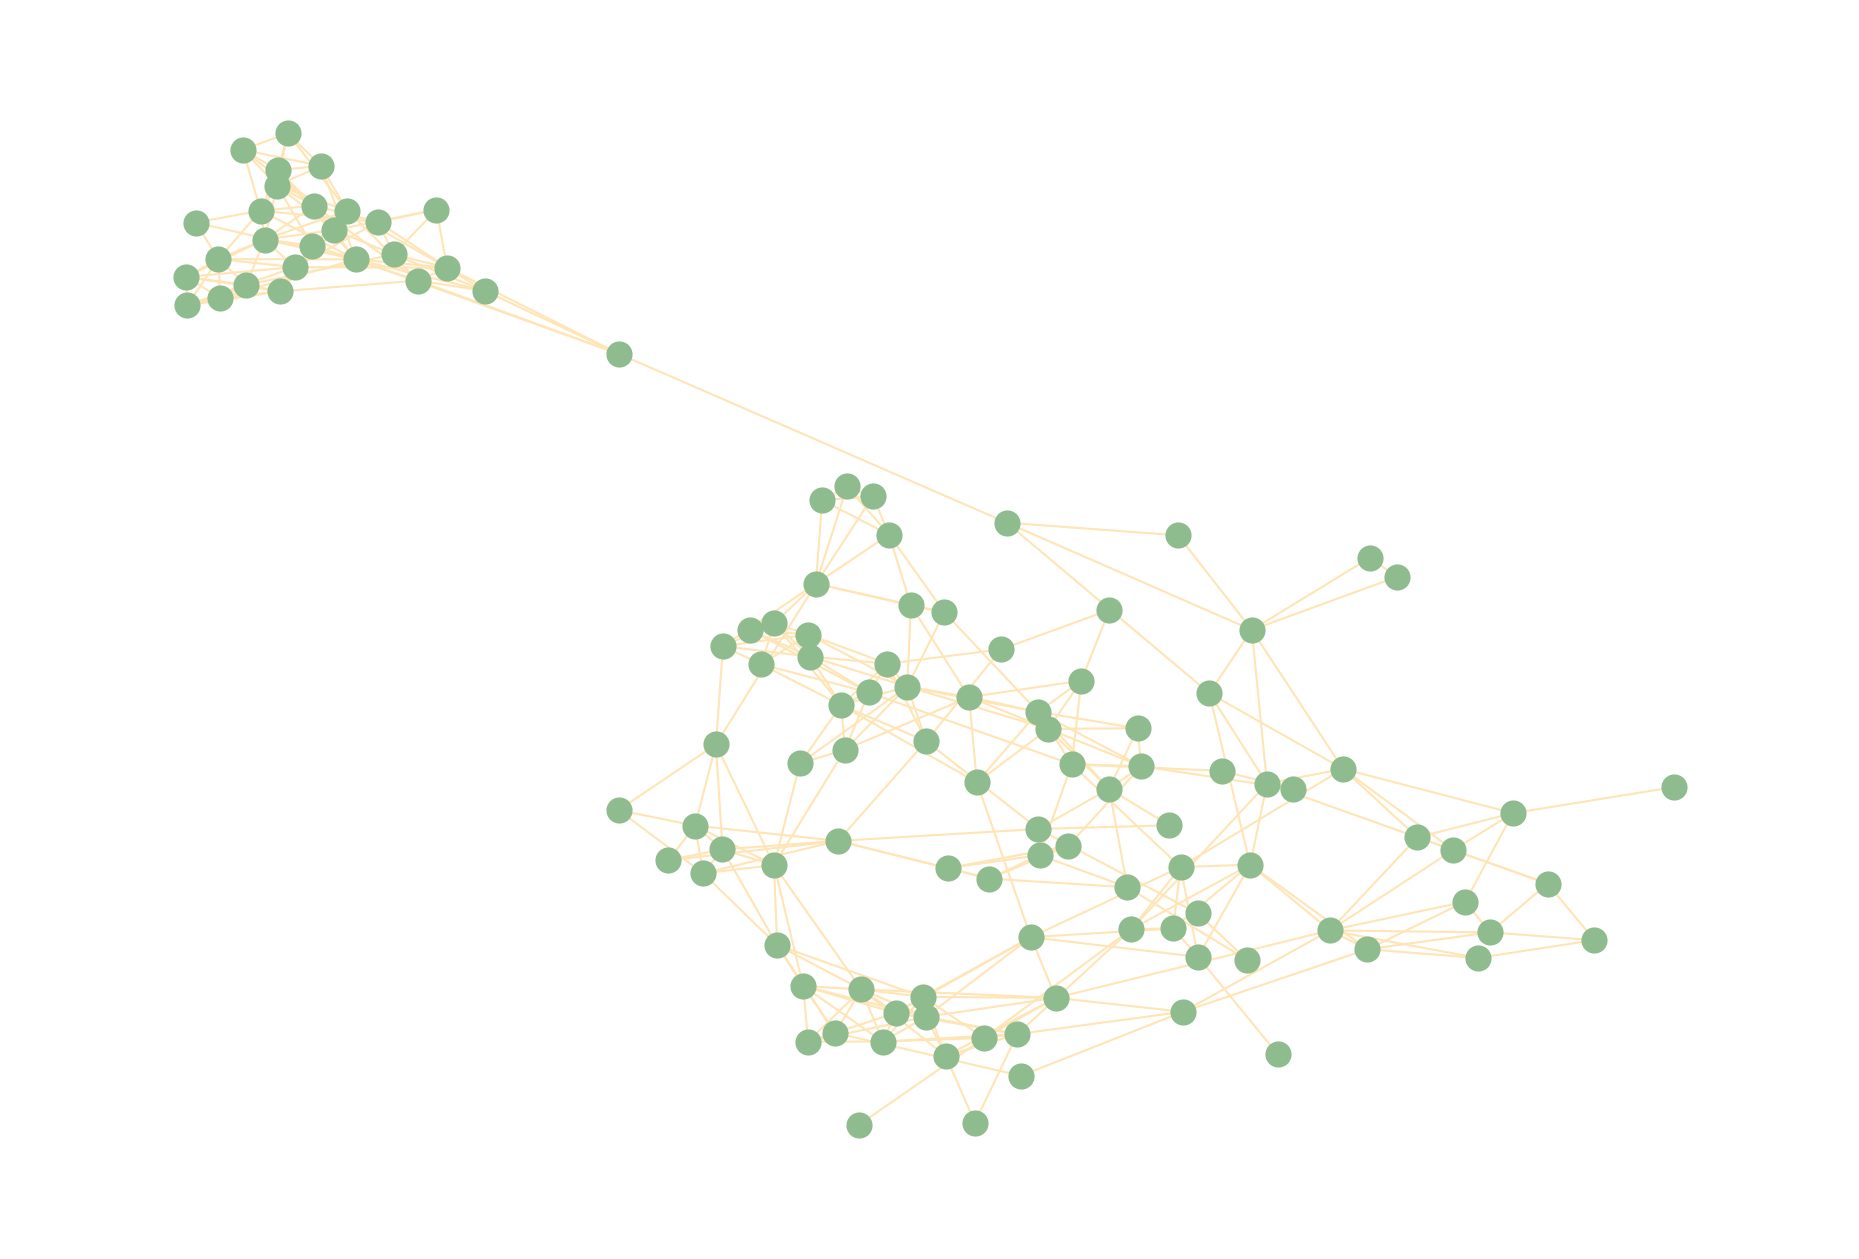

In [27]:
nx.draw_spring(G, with_labels = None, node_color="darkseagreen", edge_color="moccasin", node_size=30, width=.5)

Esta línea de código utiliza la biblioteca _**NetworkX**_ para visualizar el gráfico **G** usando el algoritmo de diseño de resorte. En otras palabras, genera una representación visual del gráfico de la red utilizando el algoritmo de spring layout, que posiciona los nodos de una manera que intenta minimizar las longitudes generales de los bordes. El gráfico resultante muestra los nodos y bordes de la red, con la configuración visual especificada.

In [28]:
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
import networkx as nx
from community import community_louvain
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.triads import triadic_census
import community
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from dcss.plotting import format_axes_commas, custom_seaborn
custom_seaborn()
import igraph as ig
import leidenalg as la

Este bloque de código configura las herramientas y bibliotecas de **_Python_** necesarias para trabajar con datos de red, incluida la creación, el análisis, la agrupación y la visualización de gráficos.

In [29]:
contact_diaries = pd.read_csv("../data/Contact-diaries-network_data_2013.csv", sep = ' ')
G = nx.from_pandas_edgelist(contact_diaries, 'i', 'j', create_using=nx.Graph())
G.name = 'Contactos reportados (Datos de los diarios)'
print(G)
print('Número de nodos', len(G.nodes)) 
print('Número de bordes', len(G.edges))
print('Promedio de grados de separación', sum(dict(G.degree).values())/len(G.nodes))

Graph named 'Contactos reportados (Datos de los diarios)' with 120 nodes and 348 edges
Número de nodos 120
Número de bordes 348
Promedio de grados de separación 5.8


El código se repite para probar un enfoque diferente con un tipo diferente de gráfico.

In [30]:
contact_diaries.j.unique()[:5]

array([ 28, 106, 147, 177, 295])

Esta línea extrae los valores únicos de la columna 'j' del **DataFrame** _contact_diaries_ y luego selecciona los primeros cinco valores únicos.

In [31]:
from networkx.algorithms.triads import triadic_census

Esta línea importa la función _triadic_census_ del módulo de tríadas dentro del subpaquete de algoritmos de **_NetworkX_**. La función _triadic_census_ calcula los recuentos de los 16 tipos posibles de tríadas (subgrafos de tres nodos) dentro de un gráfico determinado.

In [32]:
gn_50 = nx.gn_graph(50, seed = 42)
sim_50 = pd.Series(triadic_census(gn_50))
sim_50

003     17464
012      1920
102         0
021D        0
021U      184
021C       32
111D        0
111U        0
030T        0
030C        0
201         0
120D        0
120U        0
120C        0
210         0
300         0
dtype: int64

Este código genera un gráfico utilizando el algoritmo de Girvan-Newman con 50 nodos y un valor inicial específico de 42. Luego, calcula el censo triádico para este gráfico. Con la última línea, crea un objeto de la serie pandas _sim_50_ para almacenar los resultados del censo triádico.

In [33]:
gn = nx.gn_graph(20, seed = 42)
gn.name = "Grafico simulado con 20 nodos"
def describe_simulated_network(network):
    print(f'Network: {network.name}')
    print(f'Number of nodes: {network.number_of_nodes()}')
    print(f'Number of edges: {network.number_of_edges()}')
    print(f'Density: {nx.density(network)}')

describe_simulated_network(gn)

Network: Grafico simulado con 20 nodos
Number of nodes: 20
Number of edges: 19
Density: 0.05


La primera línea de código crea un gráfico utilizando el algoritmo de Girvan-Newman con 20 nodos y un valor inicial de 42. Luego, asigna un nombre al gráfico. Después de eso, define una función _describe_simulated_network(network)_ que toma una red como entrada e imprime algunas estadísticas descriptivas sobre ella. Finalmente, llama a esta función con el gráfico **gn** como argumento, mostrando información como el nombre de la red, el número de nodos y aristas, y la densidad de la red.

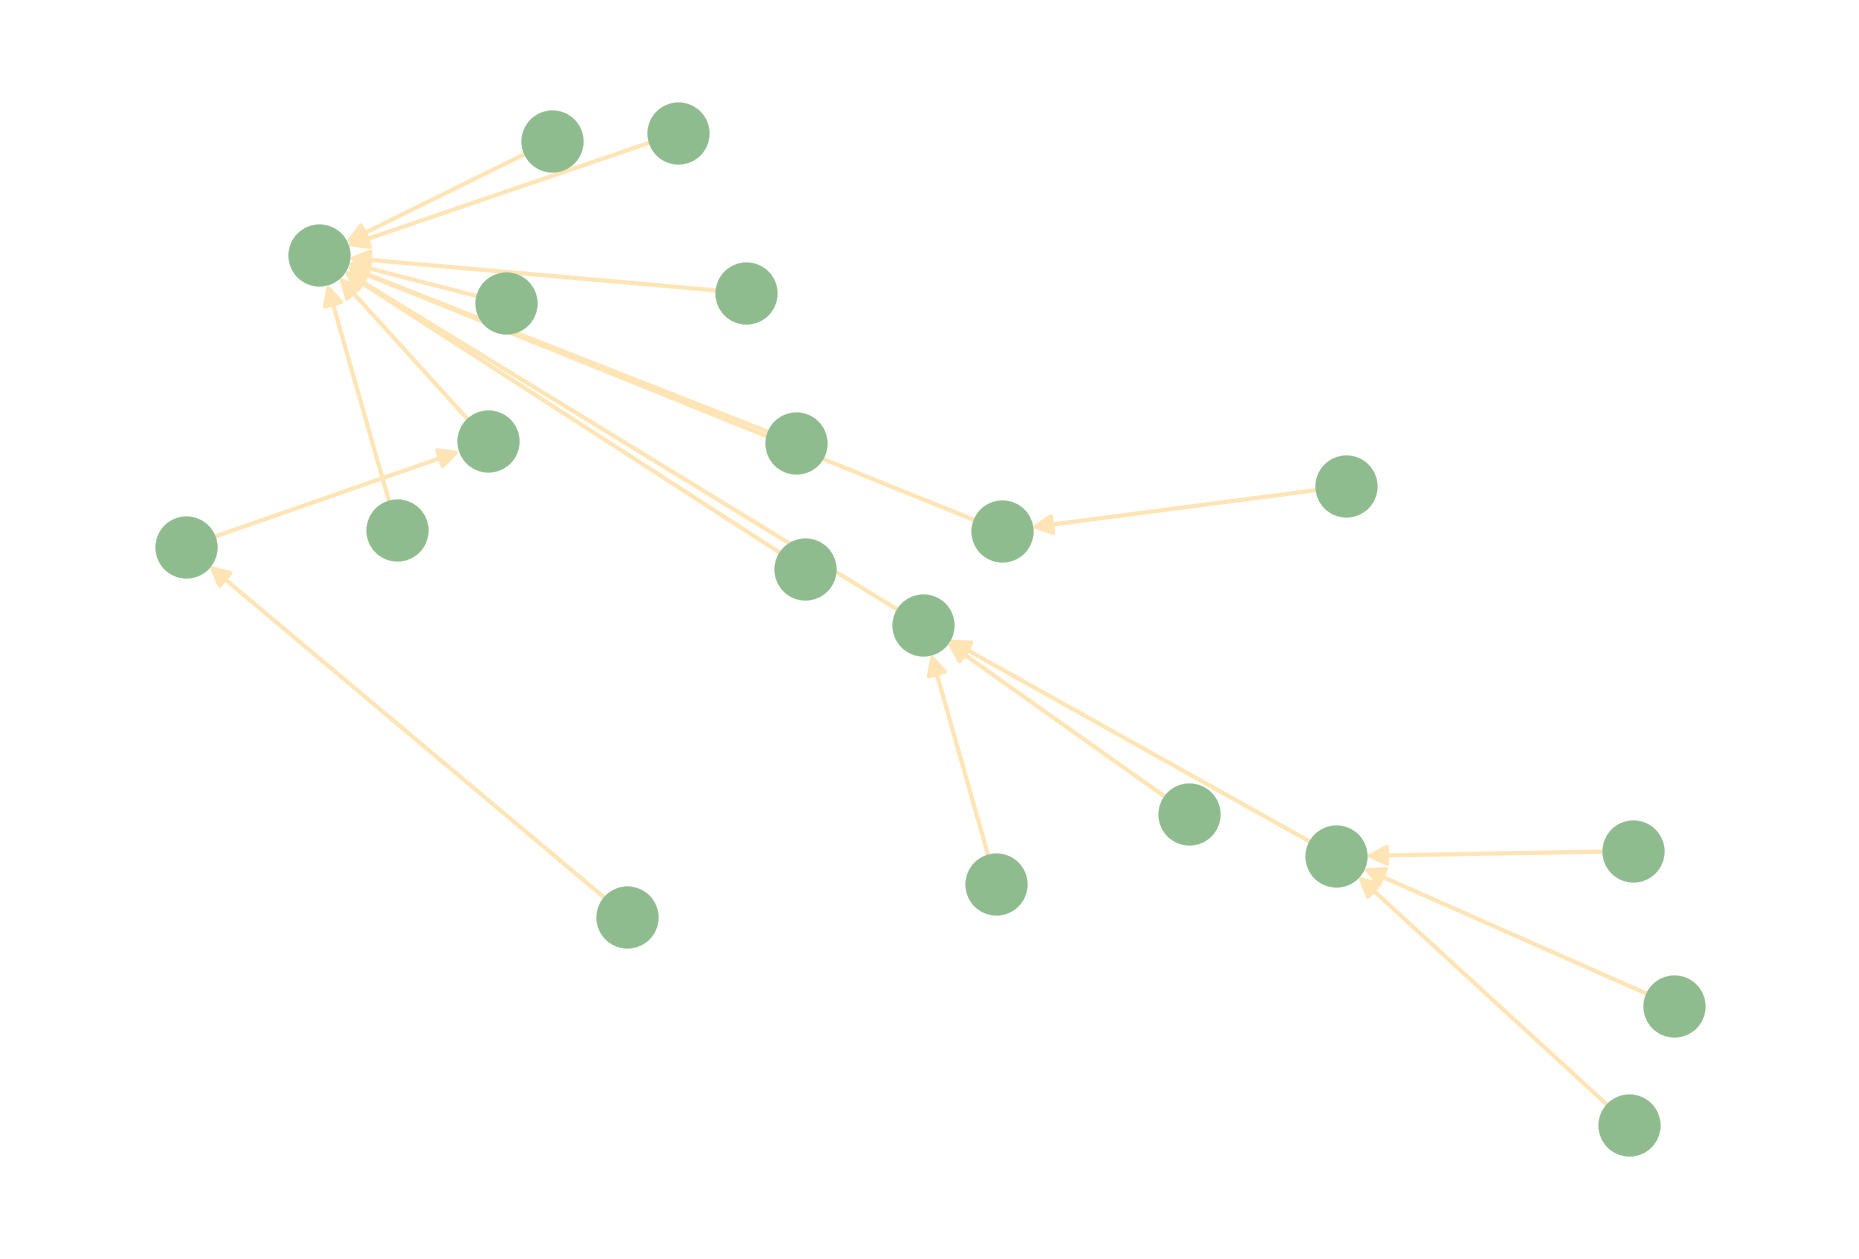

In [34]:
layout =nx.fruchterman_reingold_layout(gn, seed=12)
nx.draw(gn, layout, node_color="darkseagreen", edge_color="moccasin", node_size=200, width=1)
plt.show()

- La primera línea calcula las posiciones de los nodos utilizando el algoritmo de diseño dirigido por fuerza de Fruchterman-Reingold. El parámetro _seed=12_ garantiza que el diseño sea determinista, por lo que se generará el mismo diseño cada vez que se ejecute el código. Las posiciones de los nodos calculadas se almacenan en la variable _layout_.
- La siguiente línea utiliza la función **_NetworkX_** _draw()_ para visualizar el gráfico **gn** usando el diseño precalculado que especifica el color del nodo, el color del borde, el tamaño del nodo y el ancho del borde.
- La última línea muestra la visualización del gráfico resultante usando **_Matplotlib_**.

In [35]:
sim_20_a = pd.Series(triadic_census(gn))
sim_20_a

003     858
012     222
102       0
021D      0
021U     51
021C      9
111D      0
111U      0
030T      0
030C      0
201       0
120D      0
120U      0
120C      0
210       0
300       0
dtype: int64

Este código calcula el censo triádico para el gráfico **gn** usando la función _triadic_census_ de **_NetworkX_** y almacena los resultados en un objeto de la serie **_Pandas_** llamado _sim_20_a_. La segunda línea simplemente imprime la serie _sim_20_a_, que muestra los recuentos de los 16 tipos de tríadas diferentes que se encuentran en el gráfico **gn**.